# Regression

The theoretical linear regression of $Y$ on $X$ is the line

$x \rightarrow a^* + b^*x$ where

$$(a^*, b^*) = \underset{(a,b) \in \mathop{\mathbb{R}}^2}{\arg\max} \mathop{\mathbb{E}}[(Y − a − bX)^2]$$

minimizing we obtain:

$$a^* = \mathbb E[Y] - \frac{\textsf{Cov}(X,Y)}{\textsf{Var}(X)} \mathbb E[X], \qquad b^* = \frac{\textsf{Cov}(X,Y)}{\textsf{Var}(X)}$$

In **empirical linear regression**, we are given a collection of points ${(x_i, y_i) }_{i=1}^{n}$. The goal is to fit a linear model $Y=a+bX+ε$ by computing the Least Squares Estimator, which minimizes the loss function

$$\frac{1}{n} \sum_{i=1}^ n (y_i - (a + bx_i))^2.$$

Using the same technique as in the problems on theoretical linear regression, one obtains the solution

$$\hat{a} = \overline{y} - \frac{\overline{xy} - \overline{x}\cdot \overline{y}}{\overline{x^2} - \overline{x}^2} \overline{x} \qquad \hat{b} = \frac{\overline{xy} - \overline{x}\cdot \overline{y}}{\overline{x^2} - \overline{x}^2}.$$

In [4]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


## Regression Coefficient Distribution

analytic computation of the LSE (which is also MLE) yields:

$$\hat{{\boldsymbol \beta }} = (\mathbb {X}^ T \mathbb {X})^{-1} \mathbb {X}^ T \mathbf Y.$$

And it is distributed:

$$\hat{{\boldsymbol \beta }} \sim \mathcal{N}(\beta , \sigma ^2 (\mathbb {X}^ T \mathbb {X})^{-1}).$$

$Y$ is distributed:

$$Y∼N(X^{T}β,σ^2I_{n})$$

And, for instance, in the one dimensional case, if we assume that $ε∼N(0,σ^2I_{1000})$ for some fixed $σ^2$, so that $Y∼N(Xβ,σ^2I_{1000})$. The quadratic risk of $\hat{β}$ and the prediction error are respectively:

$$\mathbb E[| \hat{{\boldsymbol \beta }} - {\boldsymbol \beta }|_2^2 = \sigma^2 \mathrm{tr}((\mathbb {X}^ T\mathbb {X})^{-1})$$

$$\mathbb E[ | \mathbf Y- \mathbb {X}\hat{{\boldsymbol \beta }} |_2^2 ] = \sigma^2(n-p)$$

$tr$ means_ "trace" and it is the sum of all the diagonal entries.

Doing inference regarding regression means producing **non-asymptotic** estimates

<span style="color:blue">RECITATION 23 FOR SPECTRAL THEOREM, ORTHOGONAL AND ORTHONORMAL VECTORS</span>

; this will be the basis of PCA; given a _symmetric square matrix_ $A$, it can be decomposed in:

$$A = V \Lambda V^T$$

Let $A$ be a square $n×n$ matrix with n linearly independent eigenvectors qi (where i = 1, ..., n). Then A can be factorized as

$${\displaystyle \mathbf {A} =\mathbf {Q} \mathbf {\Lambda } \mathbf {Q} ^{-1}}$$

where $Q$ is the square $n×n$ matrix whose $i^{th}$ column is the eigenvector $q_i$ of $A$, and $Λ$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, $Λ_{ii} = λ_i$.

where $\Lambda$ is a diagonal matrix and $V$ is a collection of orthogonal vectors

**Projection matrixes**, then eigenvalues are $+1$ or $-1$

Consider the model Y|X∼N(XTβ,1) , where X is a p -dimensional random variable. Here, β is a fixed constant. Indicate whether the following statements are true, or false.

- $E[Y|X]$ is a constant random variable.
- The expected value of $Y$, $E[Y]$ is a constant random variable, if we assume that each Xi has mean μ. Indeed, $\mathbb {E}[Y]=\mathbb {E}[\mathbb {E}[Y|\mathbf X]]=\mathbb {E}[\mathbf X^ T\beta ]=\sum_{i=1}^ p \beta_i\mu$, which is constant, using the law of iterated expectations.
- If $X_i$'s are iid Gaussian, then the conditional mean, $E[Y|X]$ is a Gaussian random variable. Indeed, $\mathbf X^ T\beta = \sum_{i=1}^ p X_ i\beta_i$ is a sum of iid Gaussian random variables, and is itself a Gaussian random variable.

___


Test whether the j-th explanatory variable is significant in the linear regression.
- $H_0: \beta_j = 0$ vs $H_1: \beta_j \neq 0$ 
- If $\gamma_i$ " is the j-th diagonal coefficient of $\hat{{\boldsymbol \beta }} = (\mathbb {X}^ T \mathbb {X})^{-1} \mathbb {X}^ T \mathbf Y.$

with $(\gamma_j > 0)$

$${\displaystyle \frac{\widehat{\beta_j} - \beta_j}{\sqrt{\hat{\sigma^2} \gamma^2}} \sim t_{n-p}, }$$

In a bivariate linear regression:

$${\displaystyle t={\frac {{\widehat {\beta }}-\beta }{s_{\widehat {\beta }}}}\ \sim \ t_{n-2},}$$

where

$${\displaystyle s_{\widehat {\beta }}={\sqrt {\frac {{\frac {1}{n-2}}\sum _{i=1}^{n}{\widehat {\varepsilon }}_{i}^{\,2}}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}}}$$

and $\gamma_j = {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}$

[link](https://stats.stackexchange.com/questions/117406/proof-that-the-coefficients-in-an-ols-model-follow-a-t-distribution-with-n-k-d)

___

Let's make an example with $10$ data points of two independent normal random variables, with an $\mathop{\mathbb{E}}[{\beta}] = 0$.

Which values can $\beta$ take?

In [30]:
n_samples = 50000
n_data_points = 10
k = 1
dof = n_data_points - 2

In [31]:
samples = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=(n_samples, n_data_points))

In [32]:
b1_dict = {}
b0_dict = {}
var_est = {}
se_dict = {}
for cnt, sample in enumerate(samples):
    X = sample[:,0]
    y = sample[:,1]
    X = sm.add_constant(X)
    res = sm.OLS(y, X).fit()
    b0 = res.params[0]
    b1 = res.params[1]
    b0_dict[cnt] = b0
    b1_dict[cnt] = b1
    se_dict[cnt] = res.bse[1]  # standard error of the beta coefficient
    # np.sqrt((sum((y - (X[:,1] * b1 + b0))**2)/(n-2)) / sum((X[:, 1]-np.mean(X[:, 1]))**2)) =  res.bse[1]
     

In [33]:
beta_dist = pd.Series(b1_dict)
beta_dist_n = beta_dist / pd.Series(se_dict)

In [34]:
threshold = -2
from scipy.stats import t as student_t
cum_prob = len(beta_dist_n[beta_dist_n < threshold]) / len(beta_dist_n)
cum_prob_theory = round(student_t.cdf(threshold, df=dof), 4)

print("")
print(cum_prob, " (data cumulative probability %s)" % str(threshold))
print(cum_prob_theory, " (theoretical cumulative probability at %s)"% str(threshold))
print("")


0.03962  (data cumulative probability -2)
0.0403  (theoretical cumulative probability at -2)



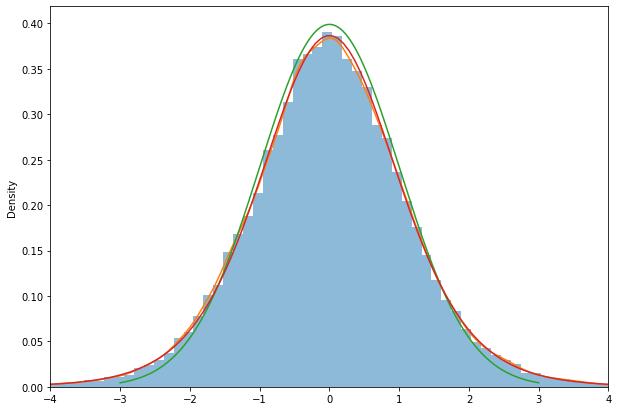

In [35]:
# -----

plt.figure(figsize=(10, 7))
plt.hist(beta_dist_n, density=True, bins=100, alpha=0.5)
beta_dist_n.plot.kde()

# -----

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))


# -----

from scipy.stats import t as student_t

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
dist = student_t(dof, 0)
plt.plot(x, dist.pdf(x))
plt.xlim([-4, 4])
plt.show()